# DATA CHALLENGE 2021 
## Stock trading : prediction of auction volumes

Le challenge sujet de notre projet est un challenge publié par CFM. Il consiste à prédire le volume (valeur totale des actions échangées) disponible aux enchères, pour 900 actions sur environ 350 jours.

## Nous divisons notre travail en 4 parties, à savoir:
- Préparation des données
- Features Engineering 
- Features selection
- Modélisation

# Importation des données

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
Input=pd.read_csv("input.csv")
output=pd.read_csv("output.csv")
input_test=pd.read_csv("input_test.csv")

In [2]:
Input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684482 entries, 0 to 684481
Columns: 127 entries, ID to NLV
dtypes: float64(124), int64(3)
memory usage: 663.2 MB


In [3]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684482 entries, 0 to 684481
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      684482 non-null  int64  
 1   target  684482 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 10.4 MB


In [4]:
Input.head()

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,148,360,0,0.000000,0.000000,0.0,0.000000,0.029317,0.000000,0.000000,...,0.004521,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580
1,149,360,1,0.000000,0.000000,0.0,0.022056,0.000000,0.036711,0.000000,...,0.008817,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708
2,150,360,2,0.000000,0.000000,0.0,0.000000,0.022267,0.000000,0.029678,...,0.018640,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476
3,151,360,3,0.000000,0.007384,0.0,0.000000,0.000000,0.007417,0.000000,...,0.013628,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181
4,152,360,4,0.088086,0.109737,0.0,0.014648,0.003662,0.036627,0.007319,...,0.008228,0.013394,0.009415,0.024983,0.019524,0.018342,0.008442,0.012525,-2.415575,0.880580


# Préparation des données

### On vérifie si tous les stocks de l'échantillon test sont dans l'échantillon train

In [171]:
input_test["pid"]
for i in range(0,len(input_test["pid"])):
    if input_test["pid"][i] not in Input["pid"]:
        print(input_test["pid"][i])

## Traitement de valeurs manquantes

In [97]:
#Définir une fonction qui nous donne le nombre et le pourcentage de valeurs manquantes par chaque colonne 

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Le nombre total de colonnes est " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes contient des valeurs manquantes.")
        return mis_val_table_ren_columns

### Les valeurs manquantes dans train

In [98]:
#Pour Train
missing_values_table(Input)

Le nombre total de colonnes est 127 colonnes.
Il y a 122 colonnes contient des valeurs manquantes.


,Missing Values,% of Total Values
abs_ret45,42857,6.3
rel_vol45,42857,6.3
abs_ret44,41499,6.1
rel_vol44,41499,6.1
abs_ret47,40879,6.0
...,...,...
rel_vol12,21343,3.1
rel_vol6,19803,2.9
abs_ret6,19803,2.9
abs_ret0,4996,0.7


### Les valeurs manquantes dans test

In [99]:
#Pour Test
missing_values_table(input_test)

Le nombre total de colonnes est 127 colonnes.
Il y a 122 colonnes contient des valeurs manquantes.


,Missing Values,% of Total Values
rel_vol2,17004,5.5
abs_ret2,17004,5.5
abs_ret47,15490,5.0
rel_vol47,15490,5.0
rel_vol42,15053,4.8
...,...,...
rel_vol7,8045,2.6
abs_ret14,6967,2.2
rel_vol14,6967,2.2
abs_ret0,766,0.2


On remplace les valeurs manquantes par la moyenne, car il y a des valeurs qui sont un peu loin de 0, surtout les rendement, donc le fait de remplacer les valeurs manquantes par des zéros ne semble pas raisonnable.


In [9]:
Mean_train = Input.mean()
Mean_test=input_test.mean()

Input.fillna(Mean_train, inplace=True)
input_test.fillna(Mean_test, inplace=True)

In [101]:
missing_values_table(Input)

Le nombre total de colonnes est 127 colonnes.
Il y a 0 colonnes contient des valeurs manquantes.


,Missing Values,% of Total Values


In [102]:
missing_values_table(input_test)

Le nombre total de colonnes est 127 colonnes.
Il y a 0 colonnes contient des valeurs manquantes.


,Missing Values,% of Total Values


 ### On mets les indices à leur place

In [176]:
Input=Input.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)


In [177]:
input_test=input_test.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)

In [105]:
Input.head(4)

,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
ID,,,,,,,,,,,,,,,,,,,,,
148,360,0,0.0,0.000000,0.0,0.000000,0.029317,0.000000,0.000000,0.000000,...,0.004521,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580
149,360,1,0.0,0.000000,0.0,0.022056,0.000000,0.036711,0.000000,0.000000,...,0.008817,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708
150,360,2,0.0,0.000000,0.0,0.000000,0.022267,0.000000,0.029678,0.014831,...,0.018640,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476
151,360,3,0.0,0.007384,0.0,0.000000,0.000000,0.007417,0.000000,0.044557,...,0.013628,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181


# Feature engineering

### Pour un bon traitement par LGBM, on transforme les pid en numériques

In [163]:
#Pour train
Input['pid']=Input['pid'].astype('category')
Input['pid'].values.categories
#Pour test
input_test['pid']=input_test['pid'].astype('category')
input_test['pid'].values.categories

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            890, 891, 892, 893, 894, 895, 896, 897, 898, 899],
           dtype='int64', length=900)

### On va ajouter quelques features élémentaires qui peuvent nous aider à mieux décrire la variable target, à savoir: minimum, maximum, écart type, somme totale, moyenne, skewness, kurtosis et ceci pour return et volume.

In [10]:
#Pour abs_return
Input["min_ret"]=Input.iloc[:,2:63].min(axis=1)
Input["max_ret"]=Input.iloc[:,2:63].max(axis=1)
Input["sum_ret"]=Input.iloc[:,2:63].sum(axis=1)
Input["mean_ret"]=Input.iloc[:,2:63].mean(axis=1)
Input["std_ret"]=Input.iloc[:,2:63].std(axis=1)
Input["skew_ret"]=Input.iloc[:,2:63].skew(axis=1)
Input["kurt_ret"]=Input.iloc[:,2:63].kurtosis(axis=1)

#Pour volume
Input["min_vol"]=Input.iloc[:,63:124].min(axis=1)
Input["max_vol"]=Input.iloc[:,63:124].max(axis=1)
Input["sum_vol"]=Input.iloc[:,63:124].sum(axis=1)
Input["mean_vol"]=Input.iloc[:,63:124].mean(axis=1)
Input["std_vol"]=Input.iloc[:,63:124].std(axis=1)
Input["skew_vol"]=Input.iloc[:,63:124].skew(axis=1)
Input["kurt_vol"]=Input.iloc[:,63:124].kurtosis(axis=1)



On fait la meme chose avec test

In [11]:
#Pour abs_return
input_test["min_ret"]=input_test.iloc[:,2:63].min(axis=1)
input_test["max_ret"]=input_test.iloc[:,2:63].max(axis=1)
input_test["sum_ret"]=input_test.iloc[:,2:63].sum(axis=1)
input_test["mean_ret"]=input_test.iloc[:,2:63].mean(axis=1)
input_test["std_ret"]=input_test.iloc[:,2:63].std(axis=1)
input_test["skew_ret"]=input_test.iloc[:,2:63].skew(axis=1)
input_test["kurt_ret"]=input_test.iloc[:,2:63].kurtosis(axis=1)

#Pour volume
input_test["min_vol"]=input_test.iloc[:,63:124].min(axis=1)
input_test["max_vol"]=input_test.iloc[:,63:124].max(axis=1)
input_test["sum_vol"]=input_test.iloc[:,63:124].sum(axis=1) #cette somme sera toujours 1
input_test["mean_vol"]=input_test.iloc[:,63:124].mean(axis=1)
input_test["std_vol"]=input_test.iloc[:,63:124].std(axis=1)
input_test["skew_vol"]=input_test.iloc[:,63:124].skew(axis=1)
input_test["kurt_vol"]=input_test.iloc[:,63:124].kurtosis(axis=1)



In [178]:
print(Input.shape)
print(input_test.shape)

(684482, 140)
(311744, 140)


In [111]:
Input.head(5)

,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,...,std_ret,skew_ret,kurt_ret,min_vol,max_vol,sum_vol,mean_vol,std_vol,skew_vol,kurt_vol
ID,,,,,,,,,,,,,,,,,,,,,
148,360,0,0.000000,0.000000,0.0,0.000000,0.029317,0.000000,0.000000,0.000000,...,0.022192,2.276835,5.298794,0.001629,0.076994,1.000000,0.016393,0.014360,2.324632,6.366880
149,360,1,0.000000,0.000000,0.0,0.022056,0.000000,0.036711,0.000000,0.000000,...,0.013489,2.276996,4.889550,0.000753,0.128265,1.000000,0.016393,0.023667,2.958102,9.487929
150,360,2,0.000000,0.000000,0.0,0.000000,0.022267,0.000000,0.029678,0.014831,...,0.029653,2.759307,7.907586,0.000643,0.124384,1.019084,0.016706,0.017694,4.014380,22.598323
151,360,3,0.000000,0.007384,0.0,0.000000,0.000000,0.007417,0.000000,0.044557,...,0.012476,2.550308,5.653979,0.001385,0.072686,1.000000,0.016393,0.014575,2.332002,5.821897
152,360,4,0.088086,0.109737,0.0,0.014648,0.003662,0.036627,0.007319,0.197325,...,0.043086,2.358176,5.877814,0.002315,0.055104,1.000000,0.016393,0.011069,1.450461,2.247590


# Feautres selection

 Nous allons mettre en évidence les variables les plus significatifs en se basant sur trois méthodes, à savoir: XGBRegressor, LGBMRegressor et Regression Lasso. Notons que dans cette partie, il ne s'agit pas de modélisation mais juste une idée sur les variables les plus significatives.

Avant de commencer, jetons un coup d'œil sur les corrélations

In [112]:
Input.corr()

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,...,std_ret,skew_ret,kurt_ret,min_vol,max_vol,sum_vol,mean_vol,std_vol,skew_vol,kurt_vol
day,1.000000,0.064297,0.055616,0.054861,0.067031,0.070607,0.061701,0.065443,0.073028,0.066195,...,0.090049,-0.077949,-0.050905,0.001682,-0.051690,-0.045100,-0.045100,-0.060213,-0.058823,-0.038529
abs_ret0,0.064297,1.000000,0.349106,0.318171,0.292795,0.275596,0.265501,0.261003,0.252084,0.256375,...,0.706460,0.398730,0.405057,0.018565,-0.012350,-0.050501,-0.050501,-0.014331,0.004735,0.000291
abs_ret1,0.055616,0.349106,1.000000,0.313118,0.297361,0.279722,0.268027,0.269588,0.260452,0.262255,...,0.618137,0.223902,0.200120,-0.021208,-0.008658,-0.011766,-0.011766,0.001668,-0.017151,-0.022121
abs_ret2,0.054861,0.318171,0.313118,1.000000,0.312962,0.294770,0.275988,0.276265,0.264186,0.265654,...,0.565496,0.109803,0.087407,-0.006781,-0.006867,-0.005603,-0.005603,0.002538,-0.014640,-0.020014
abs_ret3,0.067031,0.292795,0.297361,0.312962,1.000000,0.311232,0.298053,0.296227,0.279801,0.277552,...,0.537056,0.059815,0.040839,0.009338,-0.017737,-0.017617,-0.017617,-0.010651,-0.023778,-0.028251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sum_vol,-0.045100,-0.050501,-0.011766,-0.005603,-0.017617,-0.015723,-0.025022,-0.037063,-0.030008,-0.034573,...,0.011099,0.033407,0.038937,-0.235896,0.401496,1.000000,1.000000,0.509870,0.185563,0.135011
mean_vol,-0.045100,-0.050501,-0.011766,-0.005603,-0.017617,-0.015723,-0.025022,-0.037063,-0.030008,-0.034573,...,0.011099,0.033407,0.038937,-0.235896,0.401496,1.000000,1.000000,0.509870,0.185563,0.135011
std_vol,-0.060213,-0.014331,0.001668,0.002538,-0.010651,-0.012640,-0.019618,-0.031148,-0.023679,-0.027398,...,0.044692,0.093464,0.078227,-0.425775,0.955123,0.509870,0.509870,1.000000,0.704670,0.675467
skew_vol,-0.058823,0.004735,-0.017151,-0.014640,-0.023778,-0.029104,-0.030301,-0.033458,-0.033616,-0.035137,...,-0.012111,0.082826,0.076853,-0.060946,0.828938,0.185563,0.185563,0.704670,1.000000,0.974286


## Features selection avec Extreme Gradient Boosting

XGBoost utilise des arbres de décision comme apprenants de base, combiner de nombreux apprenants faibles pour faire un apprenant fort. En conséquence, il est appelé méthode d'apprentissage d'ensemble car il utilise la sortie de nombreux modèles dans la prédiction finale. Parmi ses avantages, on peut citer: sa puissance du traitement parallèle (c'est plus rapide que le Gradient Boosting), Il prend en charge la régularisation et l'utilisateur peut exécuter une validation croisée après chaque itération.

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from matplotlib import pyplot

X=Input.copy()
X=X.to_numpy()
Y=output["target"].copy()
Y=Y.to_numpy()

In [41]:
xgb = XGBRegressor()

xgb_tuned_params = {
 "max_depth":[5,8,10],
 "n_estimators": [100,500,1000,1500,2000] }


xgb_tuned_model = GridSearchCV(estimator = xgb, param_grid = xgb_tuned_params,
                              n_jobs=-1,verbose = 10, cv=5).fit(X, Y)

xgb_tuned_model.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [24]:
model_xgb=XGBRegressor(max_depth=10,n_estimators=100)
model_xgb.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

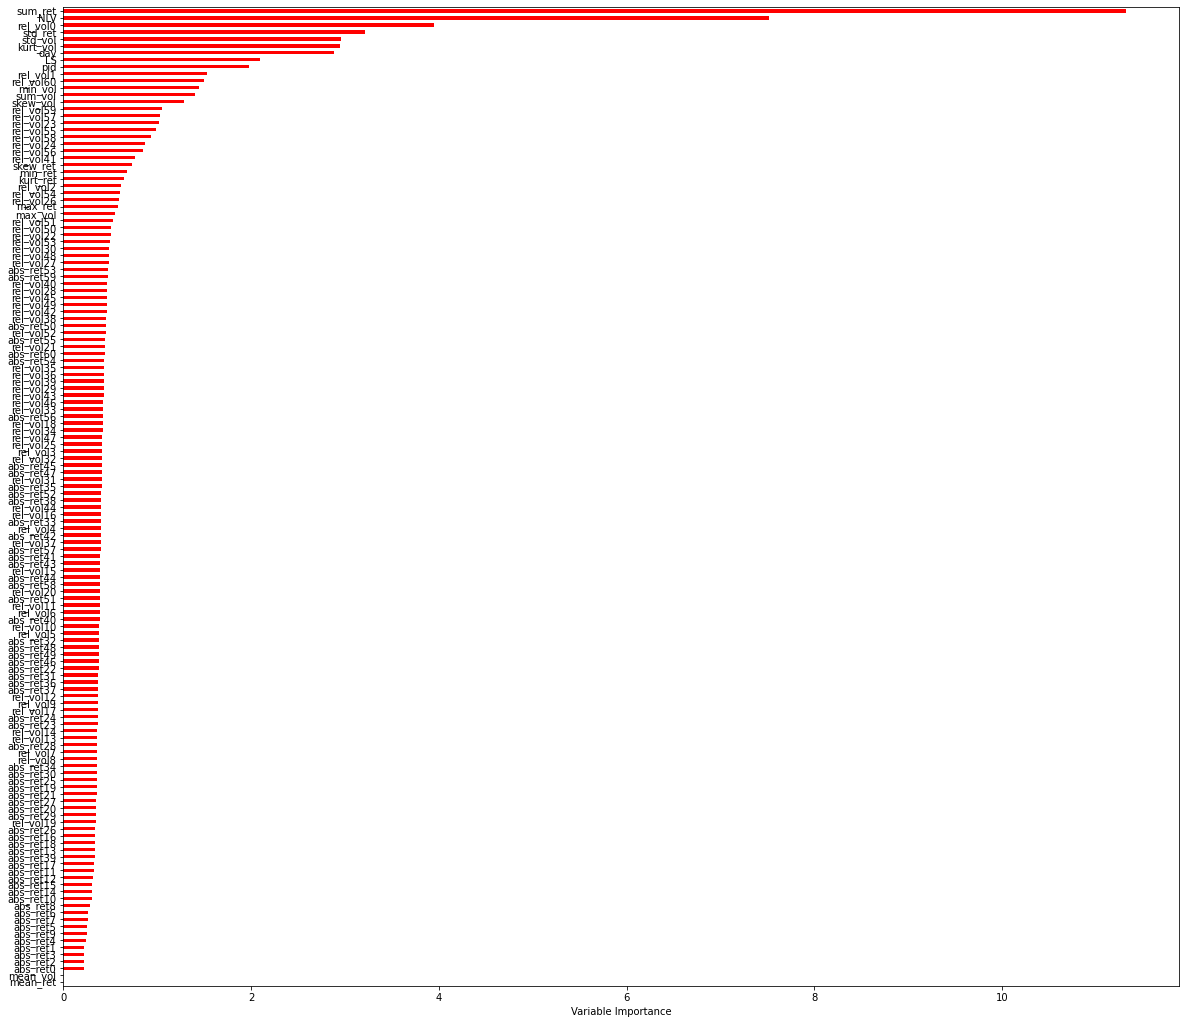

In [25]:
Importance = pd.DataFrame({'Importance':model_xgb.feature_importances_*100}, 
                          index = Input.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', figsize=(20,18))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [31]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
fea_imp_ = pd.DataFrame({'cols':Input.columns, 'fea_imp':model_xgb.feature_importances_})
display(fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False))

,cols,fea_imp
128,sum_ret,0.113257
125,NLV,0.075170
63,rel_vol0,0.039473
130,std_ret,0.032122
137,std_vol,0.029535
139,kurt_vol,0.029462
1,day,0.028878
124,LS,0.020914
0,pid,0.019775
64,rel_vol1,0.015269


# Features selection avec LGBMRegressor

LightGBM est un framework gradient boosting qui utilise un algorithme d'apprentissage basé sur les arbres de décision.
LightGBM utilise un algorithme basé sur un histogramme, c'est-à-dire qu'il regroupe les valeurs de caractéristiques continues dans des bacs discrets qui accélèrent la procédure d'apprentissage.

In [39]:
import lightgbm as lgb

lgb_model=lgb.LGBMRegressor()


lgbm_params = {"learning_rate": [0.01,0.05, 0.1],
               "n_estimators": [100,500, 1000,1500,2000],
               "max_depth": [5, 8, 10],
              "num_leaves":[32,64,128],
              "min_data_in_leaf":[100,1000]}

lgbm_cv_model = GridSearchCV(lgb_model,
                            lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X,Y)

lgbm_cv_model.best_params_


{'learning_rate': 0.1,
 'max_depth': 10,
 'min_data_in_leaf': 1000,
 'n_estimators': 1000,
 'num_leaves': 128}

In [42]:

gbm = lgb.LGBMRegressor(learning_rate= 0.1, max_depth= 10,min_data_in_leaf=1000, n_estimators=1000, num_leaves=128)

gbm.fit(X, Y)

gbm.booster_.feature_importance()

[LightGBM] [Warning] min_data_in_leaf is set=1000, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1000


array([7698, 6822,  651,  616,  571,  568,  504,  484,  566,  491,  501,
        469,  562,  482,  483,  560,  483,  554,  545,  486,  530,  509,
        511,  523,  526,  512,  551,  529,  487,  491,  486,  478,  474,
        490,  464,  547,  473,  487,  480,  485,  433,  518,  471,  470,
        461,  442,  512,  517,  486,  473,  481,  555,  528,  474,  474,
        529,  547,  594,  532,  501,  551,  493,  538, 1723,  969,  717,
        618,  625,  602,  619,  551,  530,  585,  545,  586,  557,  600,
        582,  565,  559,  623,  601,  560,  639,  636,  617,  763,  733,
        540,  637,  632,  551,  576,  674,  589,  599,  558,  598,  636,
        606,  580,  564,  633,  664,  641,  645,  605,  572,  672,  570,
        560,  624,  517,  609,  605,  562,  643,  648,  649,  629,  644,
        630,  695,  734, 3732, 3489,   54,  439, 1289,    0, 1074,  531,
        516, 1280,  398,  740,   90, 1141,  602,  708])

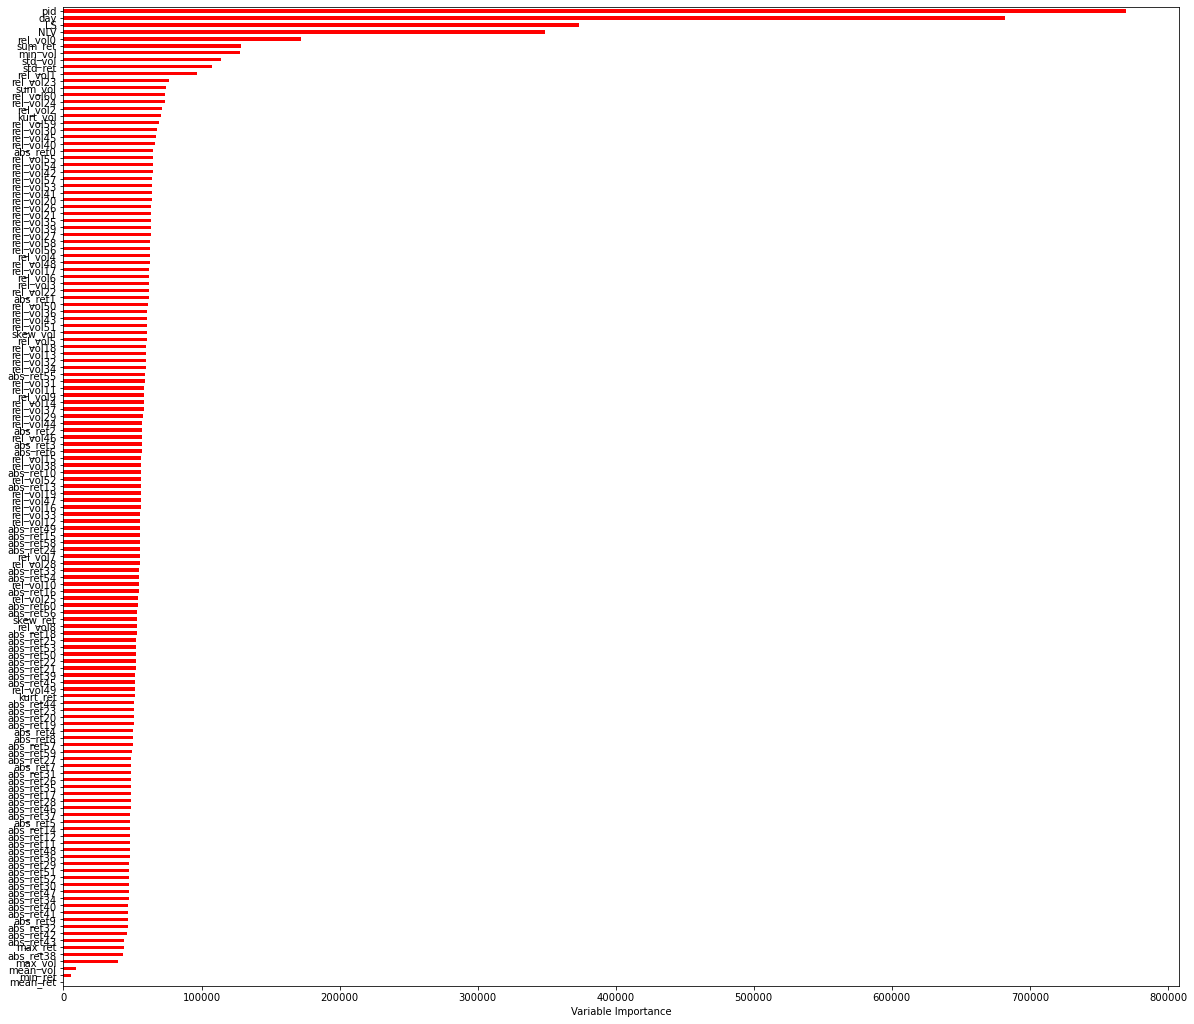

In [43]:
Importance = pd.DataFrame({'Importance':gbm.feature_importances_*100}, 
                          index = Input.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', figsize=(20,18))

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [44]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

fea_imp_ = pd.DataFrame({'cols':Input.columns, 'fea_imp':gbm.feature_importances_})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
0,pid,7698
1,day,6822
124,LS,3732
125,NLV,3489
63,rel_vol0,1723
128,sum_ret,1289
133,min_vol,1280
137,std_vol,1141
130,std_ret,1074
64,rel_vol1,969


# Features selection avec Régression Lasso

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

Étant donné que notre ensemble de données doit être mis à l'échelle à l'avance, nous pouvons utiliser le puissant objet Pipeline dans scikit-learn. Notre pipeline est constitué d'un StandardScaler et de l'objet Lasso lui-même.

In [145]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

Nous devons maintenant optimiser l'hyperparamètre alpha de la régression Lasso. Pour cela, nous allons tester les valeurs de 0,1 à 5 avec un pas de 2 (pour un bon choix de alpha, il faut tester  sur plusieurs valeurs, mais on n'a pas le choix, la machine ne réponds pas si on test sur plusieurs valeurs de alpha). Pour chaque valeur, nous calculons la valeur moyenne de l'erreur quadratique moyenne dans une validation croisée de 5 fois et sélectionnons la valeur de qui minimise ces mesures de performance moyennes. Nous pouvons utiliser l'objet GridSearchCV à cette fin.

In [146]:
selection3 = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,5,2)},
                      cv = 2, scoring="neg_mean_squared_error",verbose=3
                      )

In [147]:
selection3.fit(Input,output)
selection3.best_params_;

Fitting 2 folds for each of 3 candidates, totalling 6 fits


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3029994923669849.0, tolerance: 2056184715475.672
  model = cd_fast.enet_coordinate_descent(


[CV 1/2] END ...............................model__alpha=0.1; total time= 2.6min


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1900643014938332.8, tolerance: 1297372797617.696
  model = cd_fast.enet_coordinate_descent(


[CV 2/2] END ...............................model__alpha=0.1; total time= 2.5min


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1275038882820490.2, tolerance: 2056184715475.672
  model = cd_fast.enet_coordinate_descent(


[CV 1/2] END ...............................model__alpha=2.1; total time= 3.0min


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1652524973888627.8, tolerance: 1297372797617.696
  model = cd_fast.enet_coordinate_descent(


[CV 2/2] END ...............................model__alpha=2.1; total time= 2.5min
[CV 1/2] END ...............................model__alpha=4.1; total time= 1.6min


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295644502395806.8, tolerance: 1297372797617.696
  model = cd_fast.enet_coordinate_descent(


[CV 2/2] END ...............................model__alpha=4.1; total time= 2.5min


C:\Users\echab\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5972866799927634.0, tolerance: 11884804372124.76
  model = cd_fast.enet_coordinate_descent(


In [148]:
selection3.best_params_

{'model__alpha': 0.1}

Maintenant, nous devons obtenir les valeurs des coefficients de régression Lasso.

In [149]:
coefficients = selection3.best_estimator_.named_steps['model'].coef_

L'imporatance des features est la valeur absolue des coefficients

In [150]:
importance = np.abs(coefficients)
fea_imp_ = pd.DataFrame({'cols':Input.columns, 'fea_imp':importance[1]})
fea_imp_.loc[fea_imp_.fea_imp > 0].sort_values(by=['fea_imp'], ascending = False)

,cols,fea_imp
128,sum_ret,0.134557
125,NLV,0.130061
1,day,0.071455
63,rel_vol0,0.029656


#### En se basant sur les corrélations, la qualité des features sélectionnées par les modèles XGBRegressor, LGBMRegressor et Regression Lasso, nous décidons de ne garder  que les variables suivantes: pid, day, NLV, LS, rel_vol0, sum_ret, std_vol, min_vol, rel_vol1, std_ret, mean_ret, kurt_vol.

# Modélisation

## Découper en Train et Validation selon la date

- Chaque stock (pid) apparait plusieurs fois
- Chaque date (day) apparait plusieurs fois
- Chaque couple (pid,day) n'apparait qu'une seule fois

Il ne faut pas utiliser les memes jours pour training et validation. Donc les jours doivent etre différents entre train et validation.

Nous découpons les jous entre train et validation.

In [15]:
from sklearn.model_selection import train_test_split
nday=Input.day.unique()

In [16]:
n_train,n_val=train_test_split(nday,random_state=42,train_size=0.7)
print(nday.shape)
print(n_train.shape)
print(n_val.shape)

(805,)
(563,)
(242,)


In [17]:
l_train=n_train.tolist()
l_val=n_val.tolist()

In [18]:
Input=Input.reset_index()
output=output.reset_index()

In [19]:
Input["target"]=output.target

XY_train=Input[Input.day.isin(n_train)]
XY_val=Input[Input.day.isin(n_val)]

X_train=XY_train.drop('target',axis=1)
Y_train=XY_train.target
X_val=XY_val.drop('target',axis=1)
Y_val=XY_val.target

X_train=X_train[["pid","day","NLV","LS","rel_vol0","sum_ret","std_vol","min_vol","rel_vol1","std_ret","kurt_vol"]]
X_val=X_val[["pid","day","NLV","LS","rel_vol0","sum_ret","std_vol","min_vol","rel_vol1","std_ret","kurt_vol"]]


In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(479354, 11)
(479354,)
(205128, 11)
(205128,)


## Modélisation avec LGBM Regressor (meilleur modèle)

In [120]:
import lightgbm as lgb

lgb_model=lgb.LGBMRegressor()

lgb_params = {"learning_rate": [0.01,0.05, 0.1],
              "n_estimators": [100,500, 1000,1500,2000],
               "max_depth": [5, 8, 10],
              "num_leaves":[32,64,128],
              "min_data_in_leaf":[100,1000]}

lgb_cv_model = GridSearchCV(lgb_model,
                             lgb_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2,scoring='neg_mean_squared_error').fit(X_train,Y_train,categorical_feature=['pid'])

lgb_cv_model.best_params_



{'learning_rate': 0.05,
 'max_depth': 8,
 'min_data_in_leaf': 100,
 'n_estimators': 1500,
 'num_leaves': 128}

In [121]:

from sklearn.metrics import mean_squared_error
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(learning_rate= 0.05, max_depth= 8,min_data_in_leaf=100, n_estimators=1500, num_leaves=128,
                             colsample_bytree=0.8,subsample=0.9)

model_lgb.fit(X_train, Y_train,categorical_feature=['pid'])

#prédiction
pred_lgb=model_lgb.predict(X_val)

#mean_square_error
print(mean_squared_error(pred_lgb,Y_val))
# Training score
print(model_lgb.score(X_train,Y_train))
# validation score
print(model_lgb.score(X_val,Y_val))


C:\Users\echab\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
0.39851560072056874
0.6939801094929482
0.5104567438195429


## Modélisation avec XGB Regressor

#### Standardisation des features
Effectuant une standardisation des features avec la fonction scale(

In [ ]:
from sklearn.preprocessing import scale

X_train=X_train.values
X_val=X_val.values
Y_train=Y_train.values
Y_val=Y_val.values

X_train=scale(X_train)
X_val=scale(X_val)

In [123]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb_tuned_params = {"learning_rate": [0.01,0.05,0.1],
                    'max_depth':[5,8,10],
                  'n_estimators': [100,500,1000,1500,2000] }

xgb_tuned_model = GridSearchCV(estimator = xgb, param_grid = xgb_tuned_params,
                               n_jobs=-1,verbose = 10, cv=5,scoring='neg_mean_squared_error').fit(X_train, Y_train)
xgb_tuned_model.best_params_



{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 1500}

In [43]:
from xgboost import XGBRegressor

model_xgb=XGBRegressor(learning_rate= 0.05, max_depth= 8, n_estimators=1500,
                             colsample_bytree=0.8,subsample=0.9)

model_xgb=model_xgb.fit(X_train,Y_train)

#prédiction
pre_xgb=model_xgb.predict(X_val)
#mean square error
print(mean_squared_error(pre_xgb,Y_val))
# Training score
print(model_xgb.score(X_train,Y_train))
# validation score
print(model_xgb.score(X_val,Y_val))

[14:30:58] WARNING: ..\src\learner.cc:541: 
Parameters: { min_data_in_leaf, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.47904958144038606
0.7104192964365904
0.41152744949965137


## Modélisation avec Regression Lasso (très faible)

In [124]:
from sklearn import linear_model

model_lasso=linear_model.Lasso()
lasso_params ={'alpha':np.arange(0.1,6,0.2)} 
lasso_cv_model = GridSearchCV(model_lasso, lasso_params, cv=5, n_jobs=-1, 
                              verbose=2,scoring='neg_mean_squared_error').fit(X_train,Y_train)

lasso_cv_model.best_params_


{'alpha': 0.1}

In [94]:
from sklearn import linear_model

model_lasso=linear_model.Lasso(alpha=0.1)
model_lasso=model_lasso.fit(X_train,Y_train)

#prédiction
pre_lasso=model_lasso.predict(X_val)

#mean_square_error
print(mean_squared_error(pre_lasso,Y_val))
# Traing score
print(model_lasso.score(X_train,Y_train))
# validation score
print(model_lasso.score(X_val,Y_val))

0.6839026835416896
0.1671495662281305
0.1598824587890939


## Modélisation avec Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from time import time

tree_range = 

tuned_parameters ={ 'n_estimators':[20,100,400,1000]}

Cart_grid = GridSearchCV(RandomForestRegressor(max_features=4),tuned_parameters,
                         cv=5,scoring='neg_mean_squared_error',n_jobs=4).fit(X_train,Y_train)



In [7]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=100)
model_RF.fit(X_train,Y_train)

pre_RF=model_RF.predict(X_val)

print(mean_squared_error(pre_RF,Y_val))
# Traing score
print(model_RF.score(X_train,Y_train))
# validation score
print(model_RF.score(X_val,Y_val))


0.5739269171737724
0.9179178379771056
0.33011925465685654


# Prédiction pour le TEST (avec LGBM)

Nous avons obtenu des meilleurs résultats en cross-validation avec  max_depth= 8. Mais, puisque nous avons plus de données à notre disposition, et pour eviter le risque d'overfit, nous essayerons d'ajouter un degré de liberté et nous prenons max_depth= 9.

## fittons le modèle sur tout l'ensemble des données de train

In [125]:
Input=Input.set_index('ID', drop=True, append=False, inplace=False, verify_integrity=False)

In [126]:
Input_train=Input[["pid","day","NLV","LS","rel_vol0","sum_ret","std_vol","min_vol","rel_vol1","std_ret","kurt_vol"]]
output_train=output.target
print(Input_train.shape, output_train.shape)

(684482, 11) (684482,)


In [128]:
model_lgb = lgb.LGBMRegressor(learning_rate= 0.05, max_depth= 9,min_data_in_leaf=100, n_estimators=1500, num_leaves=128,
                             colsample_bytree=0.8,subsample=0.9)

model_lgb.fit(Input_train, output_train,categorical_feature=['pid'])

# Training score
print(model_lgb.score(Input_train,output_train))


C:\Users\echab\anaconda3\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
0.6801528340653251


### Prédiction pour test

In [130]:
Input_test=input_test[["pid","day","NLV","LS","rel_vol0","sum_ret","std_vol","min_vol","rel_vol1","std_ret","kurt_vol"]]

In [132]:
pred_test=model_lgb.predict(Input_test)

In [133]:
pred_test

array([-2.15408079, -2.15750054, -2.0603516 , ..., -1.57275361,
       -1.60687197, -1.37257636])

In [136]:
Input_test["target"]=pred_test
resultat_CFM=Input_test["target"]

<ipython-input-136-777363df9fe2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Input_test["target"]=pred_test


In [137]:
resultat_CFM

ID
1070752   -2.154081
1070753   -2.157501
1070754   -2.060352
1070755   -2.012710
1070756   -2.226319
             ...   
2027595   -1.230641
2027596   -1.998688
2027597   -1.572754
2027598   -1.606872
2027599   -1.372576
Name: target, Length: 311744, dtype: float64

## Sauvegarde les résultats 

In [138]:
resultat_CFM.to_csv('C:/Users/echab/OneDrive/Bureau/M2-IS/1-Apprentisage-Statistique/resultat_CFM.csv')